# Hands-On Machine Learning

## Ch2. 머신러닝 프로젝트 처음부터 끝까지

### 2.2.1 문제정의

머신러닝을 통해 얻게 되는 모델의 목적이 무엇인지를 명확히 해야 합니다.\
문제 정의 단계에서는 구체적으로 지도 학습 / 비지도 학습, 분류 / 회귀, 배치 / 온라인 학습 등 방법론적인 분류를 수반합니다.






### 2.2.2 성능 측정 지표 선택

다음으로는 모델의 성능을 측정할 지표를 선택합니다. \
회귀 모델에서는 **평균 제곱근 오차**(Root Mean Square Eroor; RMSE)를 전형적인 성능지표로 삼습니다.
<br/>
<br/>

$${\rm{RMSE}  }({\bf X},h) = \sqrt{ {1\over m}\sum_{i=1}^m (h({\bf x}^{(i)}) -y^{(i)})^2}$$  

<br/>

* $m$은 데이터 샘플의 수
* ${\bf{x}}^{(i)}$ 는 데이터셋에 있는 i번째 샘플(레이블은 제외)의 전체 특성값의 벡터(본문의 예시에서는 경도, 위도, 주민, 중간 소득)<br/>
* $y^{(i)}$ 는 해당 레이블(해당 샘플의 기대 출력값)<br/>
* ${\bf{X}}$ 는 데이터셋에 있는 모든 샘풀의 모든 특성값(레이블은 제외)을 포함하는 행렬. 이때 샘플 하나가 하나의 **행**이 되고 i번째 행은 $({\bf{x}}^{(i)})^{T}$ 입니다.
* $h$ 는 시스템의 예측 함수(가설; Hypothesis). ${\bf{x}}^{(i)}$를 받으면 그 샘플에 대한 예측값 $\hat y ^{(i)} = h({\bf{x}}^{(i)})$ 를 반환합니다.
* $\sum$ 내부에 있는 오차는 **(예측값 - 실제 데이터)** 를 의미합니다.

<br/>
경우에 따라서 **평균 절대 오차**(Mean Absolute Error; MAE)를 고려해볼 수도 있습니다.
<br/>
※ RMSE와 MAE의 수학적 의미는 예측값의 벡터와 타깃값의 벡터 사이의 거리와 연관지을 수도 있습니다.

### 2.3.2 데이터 다운로드

* 대용량 데이터 시트는 CSV(Comma-separated value) 확장자 파일

웹 브라우저를 통해 파일을 내려받아서 사용하는 것이 아니라 코드 내에서 데이터를 받아오게 하는, 즉 데이터 갱신 자동화 예시는 다음과 같다

In [1]:
import os
import tarfile
from six.moves import urllib
import numpy as np

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

이후 fetch_housing_data()를 호출하면 작업공간에 datasets/housing 디렉토리를 만들고 housing.tgz 파일을 내려받고 같은 디렉터리에 압축을 풀어 housing.csv 파일을 만듭니다. 

In [2]:
fetch_housing_data()

In [3]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

**head()** 메서드를 통해 데이터의 일부분을 확인할 수 있습니다.
데이터셋의 처음 다섯 행은 다음과 같습니다.

In [4]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**info()** 메서드는 데이터에 대한 간략한 설명을 알려줍니다. 특히 각 특성의 **데이터 타입**과 **null**이 아닌 값의 개수를 확인하는 데 유용합니다

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


ocean_proximity 필드만 빼고 모든 특성이 숫자형입니다. 어떤 카테고리가 있고 각 카테고리마다 얼마나 많은 구역이 있는지 **value_counts()** 메서드로 확인합니다.

In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

**describe()** 메서드는 숫자형 특성의 요약 정보를 보여줍니다

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**describe()** 메서드가 숫자형 특성의 요약정보(중간값, 표준편차 등)를 보여줬다면 데이터의 형태를 시각적으로 나타내는 메서드도 있습니다.
<br/>
**hist()** 메서드를 호하면 모든 숫자형 특성에 대한 히스토그램을 출력합니다.

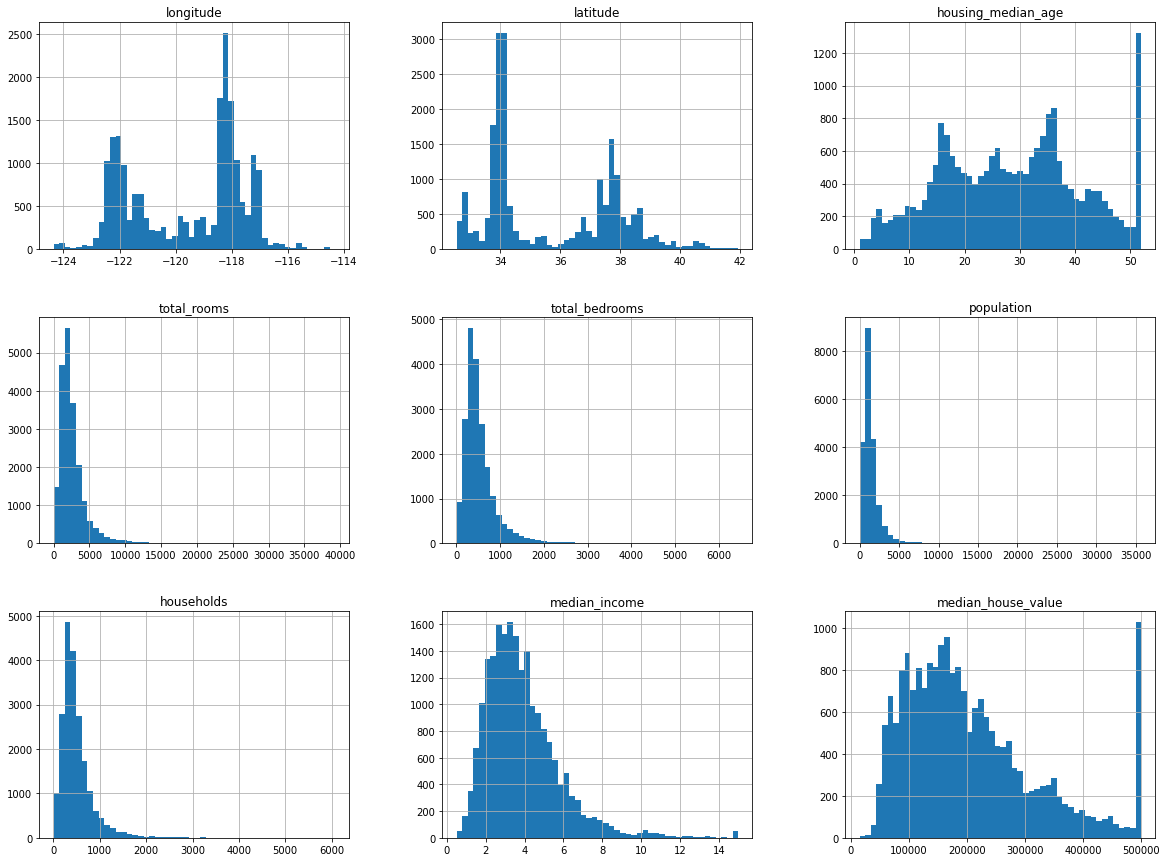

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

※ 데이터를 더 깊게 들여다보기 전에 테스트 세트를 따로 떼어놓아야 합니다. 그리고 테스트 세트를 절대로 들여다보면 안됩니다.

### 2.3.4 테스트 세트 만들기

* 데이터 스누핑(data snooping) 편향 : 테스트 세트를 자진해서 떼어놓지 않아 실제 성능보다 테스트 성능이 과장되는 것
* 테스트 세트 생성은 무작위로 데이터셋의 20%정도를 선택해 분류하면 됩니다. 

아래 코드는 테스트 세트를 생성하는 과정입니다.

In [9]:
import numpy as np

def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


* 겹치지 않는 테스트 세트 만들기
아래 코드는 각 샘플마다 식별자 칼럼(열) 또는 인덱스를 id로 하여 새로운 테스트 세트가 이전에 훈련 세트에 있던 샘플을 포함시키지 않게 하는 코드입니다.

In [11]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio *2**32

def split_train_test_by_id(data,test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [12]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

위도와 경도를 결합하여 ID 만들기 (불변 / 안전한 특성 사용)

In [13]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [14]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20


사이킷런은 데이터셋을 여러 서브셋으로 나누는 다양한 방법을 제공합니다.<br/>
가장 간단한 함수는 **train_set_split** 입니다. <br/><br/>
train_set_split 함수의 parameter로는 (데이터, test_size = 테스트비율(0~1 사이의 값), random_state = 랜덤 상수(아무 값이나 상관 없음. 통상 42))가 있습니다.

In [15]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [16]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


데이터셋이 충분히 크다면(특히 특성 수에 비해) 일반적으로 이러한 순수 무작위 샘플링 방식이 괜찮지만, 그렇지 않은 경우에는 샘플링 편향이 생길 가능성이 큽니다. 설문조사 기관에서 1,000명에게 질문 몇 개를 하려 할 때 그냥 전화번호부에서 1,000명을 무작위로 뽑는 것이 아닙니다. "전체 집단의 특성을 대표할 수 있도록" 샘플링을 수행해야 합니다.<br/>
잘 구성된 설문조사는 샘플에서도 이러한 비율을 유지해서 여성 513명, 남성 487명으로 구성해야 합니다. 이를 **계층적 샘플링**(stratified sampling)이라고 합니다. 전체 모수는 **계층**(strata)이라는 동질의 그룹으로 나뉘고 테스트 세트가 전체 모수를 대표하도록 각 계층에서 올바른 수의 샘플을 추출합니다. 

* **ceil** 함수 : 올림을 수행

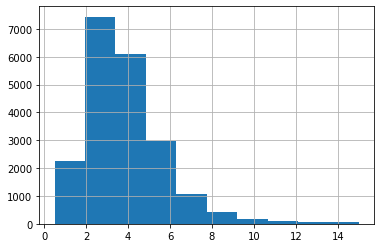

In [17]:
housing["median_income"].hist()

다음 코드는 중간 소득을 1.5로 나누고(소득의 카테고리 수를 제한하기 위해) 이산 카테고리를 만들고 5보다 큰 카테고리는 모두 5로 합칩니다.

In [18]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace = True)

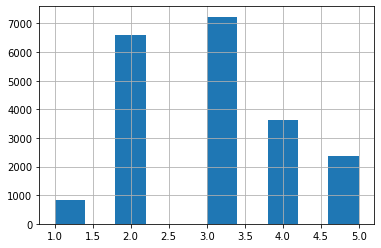

In [19]:
housing["income_cat"].hist()   #적절히 분류된 소득 카테고리의 히스토그램

* 사이킷런의 **Stratified ShuffleSplit** : 계층 샘플링

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

###2.4.1 데이터 이해를 위한 탐색과 시각화 
<br/><br/>
pandas의 .plot 메서드로 series와 dataframe의 데이터를 다양한 형식으로 시각화할 수 있습니다.
<br/>
DataFrame.plot(args, kwargs) 형으로 사용하며 사용가능한 parameter 중 주요한 몇 가지를 정리해보았습니다.


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

![SmartSelect_20221106_130630_Chrome.jpg](attachment:SmartSelect_20221106_130630_Chrome.jpg)

본문에서는 alpha 값을 사용하여 투명도를 조절하기도 하였습니다.

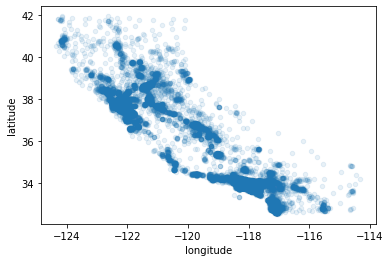

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

적외선 온도계처럼 연속적인 색 변화를 표현할 수도 있습니다. 
<br/>
* colorbar 는 scatter(산점도)와 hexbin(육각형 지도) 에서만 사용가능한 옵션입니다.

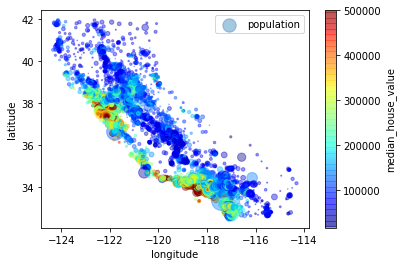

In [22]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population",
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)

산점도를 실제 지도에 덧씌워 표현하기


먼저 지도를 저장합니다.<br/>
주석 아래에 있는 첫 번째 코드를 봅시다. <br/>

**os.path.join**은 경로(패스)명 조작에 관한 처리를 모아둔 함수입니다. os 모듈을 import해야 사용할 수 있으며 파라미터로 전달된 두 개의 문자열을 결합하여 한 개의 경로로 정리할 수 있습니다.
<br/><br/>
*example*<br/>
print("join(): ")+os.path.join("/A/B", file.py")
<br/><br/>
실행결과 : /A/B/file.py
<br/><br/>
https://www.geeksforgeeks.org/python-os-path-join-method/

In [23]:
# Download the California image
images_path = os.path.join(".", "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/end_to_end_project/california.png',
 <http.client.HTTPMessage at 0x7fe95ff44c90>)

###2.4.2 상관계수 구하기 
<br/>
<br/>
(1) .corr() 메서드를 사용하여 수치적으로 확인


In [24]:
corr_matrix = housing.corr()

In [25]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.010690
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,-0.085528
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.146920
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.220528
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.015662
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,0.025809
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,0.038490
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.902750
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.643892
income_cat,-0.010690,-0.085528,-0.146920,0.220528,0.015662,0.025809,0.038490,0.902750,0.643892,1.000000


In [26]:
corr_matrix["median_house_value"]   #중간 주택 가격 열을 불러옴으로 위도, 경도 등 다른 특성 사이의 상관관계를 확인

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
income_cat            0.643892
Name: median_house_value, dtype: float64

In [27]:
corr_matrix["median_house_value"].sort_values(ascending=False)   #sort_values()를 사용하여 출력값 정렬. ascending=False는 내림차순을 의미 

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

* 상관계수는 선형적인 상관관계만 측정합니다. 비선형적인 관계는 잡을 수 없으며 기울기에 관계가 없습니다.

(2) scatter_matrix 함수로 산점도 행렬 구하기

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe95fb65b90>,
      dtype=object)

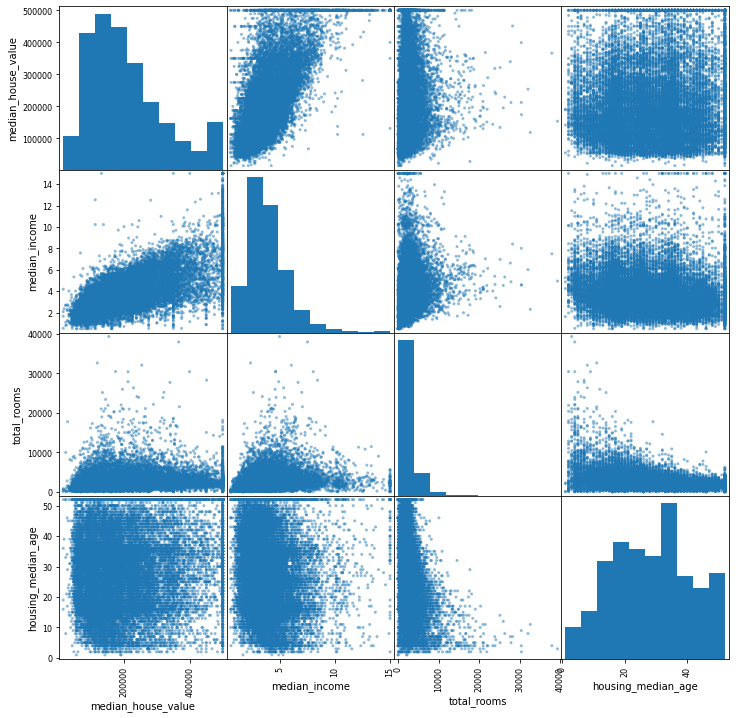

In [28]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]  #housing DataFrame의 특성이 11개 이므로 상관계수는  총 11*2 = 121개가 그려짐. 몇 개를 선택한 것. attributes 리스트를 사용하지 않고 바로 넣어도 가능
scatter_matrix(housing[attributes], figsize=(12,12))   #figsize=(가로, 세로)

대각요소(diagonal entry)들은 자신에 대한 상관계수이기 때문에 직선이 되어버립니다. 의미가 없는 결과이기 때문에 pandas에서는 각 특성의 히스토그램을 출력합니다.

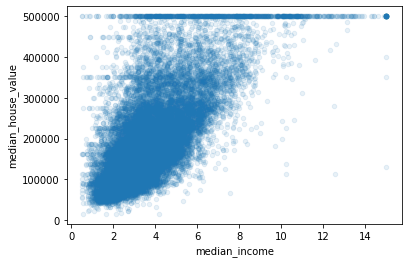

In [29]:
housing.plot(kind="scatter", x="median_income",y="median_house_value",alpha=0.1)   #median_income과 median_house_value 데이터를 받아와서 산점도를 그린 것

위 그래프가 시사하는 것들<br/>

* 상관관계가 매우 강하다. 위쪽으로 향하는 경향을 볼 수 있으며 포인트들이 많이 흩어져 있지 않다.<br/>

* 앞서 본 가격 제한 값이 &#36;500,000에서 수평선으로 잘 보이지만 그래프의 형태를 망가뜨린다. <br/>
* 이러한 수평선은 &#36;280,000, &#36;350,000, &#36;450,000 근처에도 있는데 학습 측면에서는 그리 좋은 데이터가 아니므로 해당 구역을 제거하는 것이 좋다.